In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to range between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Concatenate all the images (60,000 images total) and labels
all_images = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Shuffle the entire dataset of 60,000 images
shuffle_indices = np.random.permutation(len(all_images))
shuffled_images = all_images[shuffle_indices]
shuffled_labels = all_labels[shuffle_indices]

# Split into 50,000 images for training and 10,000 images for testing
train_images = shuffled_images[:50000]
train_labels = shuffled_labels[:50000]
test_images = shuffled_images[50000:]
test_labels = shuffled_labels[50000:]

# Randomly select 10,000 images from the training set to add to the test set
num_train_in_test = 10000
train_indices_for_test = np.random.permutation(len(train_images))[:num_train_in_test]

# Extract the selected training images and labels for the test set
train_images_for_test = train_images[train_indices_for_test]
train_labels_for_test = train_labels[train_indices_for_test]

# Concatenate the selected training images with the test set
combined_test_images = np.concatenate((test_images, train_images_for_test), axis=0)
combined_test_labels = np.concatenate((test_labels, train_labels_for_test), axis=0)

# Create a membership flag: 0 means the image was not in the training set, 1 means it was part of the training set
membership_flag = np.concatenate((np.zeros(len(test_images)), np.ones(num_train_in_test)))

# Ensure labels are 1D (flatten to (None,))
train_labels = train_labels.reshape(-1)  # Reshape to remove any extra dimensions
combined_test_labels = combined_test_labels.reshape(-1)

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)  # Shape will become (50000, 10)
combined_test_labels = to_categorical(combined_test_labels, 10)  # Shape will become (15000, 10)

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers to feed it into a fully connected layer
model.add(layers.Flatten())

# Fully connected layer with 128 units
model.add(layers.Dense(128, activation='tanh'))

# Output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size=256,
                    validation_data=(combined_test_images, combined_test_labels),
                    )

# Evaluate the model on the combined test set
test_loss, test_acc = model.evaluate(combined_test_images, combined_test_labels)
print(f'Test accuracy: {test_acc:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 146s 1us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3630 - loss: 1.7833 - val_accuracy: 0.5360 - val_loss: 1.3477
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5631 - loss: 1.2578 - val_accuracy: 0.5979 - val_loss: 1.1537
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6165 - loss: 1.1097 - val_accuracy: 0.6374 - val_loss: 1.0496
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6500 - loss: 1.0126 - val_accuracy: 0.6608 - val_loss: 0.9885
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6640 - loss: 0.9659 - val_accuracy: 0.6734 - val_loss: 0.9586
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6948 - loss: 0.8844 - val_accuracy: 0.6836 - val_loss: 0.9121
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7175 - loss: 0.8203 - val_accuracy: 0.6949 - val_loss: 0.8924
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7356 - loss: 0.7731 - val_acc

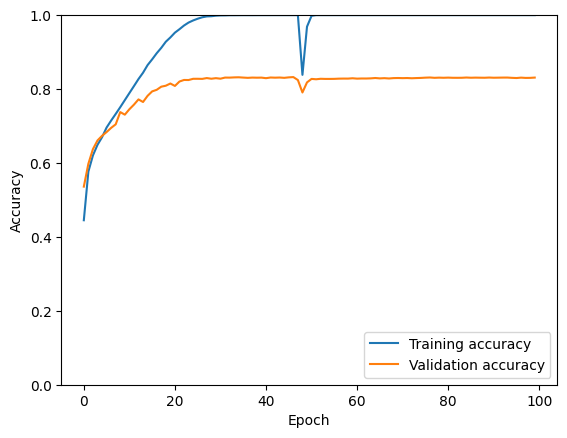

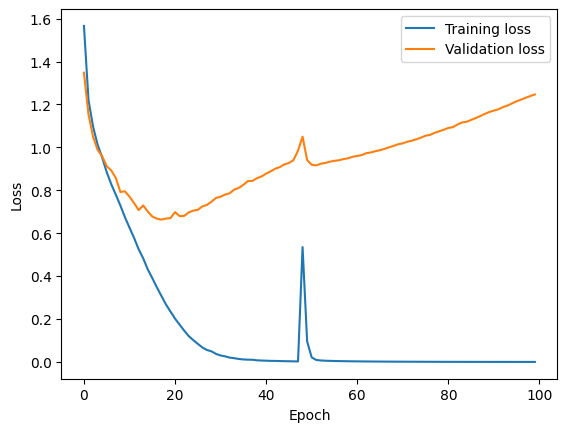

In [ ]:
# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Print the average confidence to get a sense of the results
print(f"Average confidence: {np.mean(max_confidences):.2f}%")


625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
Average confidence: 95.19%


In [ ]:
# Set a threshold for confidence (e.g., 90%)
confidence_threshold = 99

# Find data points above and below the threshold
above_threshold = max_confidences >= confidence_threshold
below_threshold = max_confidences < confidence_threshold

# Split based on membership flag
above_threshold_training = np.sum(above_threshold & (membership_flag == 1))
above_threshold_non_training = np.sum(above_threshold & (membership_flag == 0))

below_threshold_training = np.sum(below_threshold & (membership_flag == 1))
below_threshold_non_training = np.sum(below_threshold & (membership_flag == 0))

# Print out the results
print(f"Training images above {confidence_threshold}%: {above_threshold_training}")
print(f"Non-training images above {confidence_threshold}%: {above_threshold_non_training}")
print(f"Training images below {confidence_threshold}%: {below_threshold_training}")
print(f"Non-training images below {confidence_threshold}%: {below_threshold_non_training}")

Training images above 99%: 8566
Non-training images above 99%: 5500
Training images below 99%: 1434
Non-training images below 99%: 4500


In [ ]:
# Set a threshold for confidence (e.g., 99%)
confidence_threshold = 98

# Calculate TP and FP by comparing predicted classes with true labels
correct_predictions = predicted_classes == true_labels
incorrect_predictions = ~correct_predictions

# True Positives (TP) and False Positives (FP) for above and below the threshold, split by membership
tp_above_threshold_training = np.sum(correct_predictions & above_threshold & (membership_flag == 1))
fp_above_threshold_training = np.sum(incorrect_predictions & above_threshold & (membership_flag == 1))

tp_above_threshold_non_training = np.sum(correct_predictions & above_threshold & (membership_flag == 0))
fp_above_threshold_non_training = np.sum(incorrect_predictions & above_threshold & (membership_flag == 0))

tp_below_threshold_training = np.sum(correct_predictions & below_threshold & (membership_flag == 1))
fp_below_threshold_training = np.sum(incorrect_predictions & below_threshold & (membership_flag == 1))

tp_below_threshold_non_training = np.sum(correct_predictions & below_threshold & (membership_flag == 0))
fp_below_threshold_non_training = np.sum(incorrect_predictions & below_threshold & (membership_flag == 0))

# Total counts for each category
total_training = np.sum(membership_flag == 1)
total_non_training = np.sum(membership_flag == 0)

# Calculate percentages
tp_above_threshold_training_pct = (tp_above_threshold_training / total_training) * 100
fp_above_threshold_training_pct = (fp_above_threshold_training / total_training) * 100
tp_above_threshold_non_training_pct = (tp_above_threshold_non_training / total_non_training) * 100
fp_above_threshold_non_training_pct = (fp_above_threshold_non_training / total_non_training) * 100

tp_below_threshold_training_pct = (tp_below_threshold_training / total_training) * 100
fp_below_threshold_training_pct = (fp_below_threshold_training / total_training) * 100
tp_below_threshold_non_training_pct = (tp_below_threshold_non_training / total_non_training) * 100
fp_below_threshold_non_training_pct = (fp_below_threshold_non_training / total_non_training) * 100

# Print out the results
print(f"Above {confidence_threshold}% confidence:")
print(f"  Training Data - TP: {tp_above_threshold_training_pct:.2f}%, FP: {fp_above_threshold_training_pct:.2f}%")
print(f"  Non-Training Data - TP: {tp_above_threshold_non_training_pct:.2f}%, FP: {fp_above_threshold_non_training_pct:.2f}%")

print(f"\nBelow {confidence_threshold}% confidence:")
print(f"  Training Data - TP: {tp_below_threshold_training_pct:.2f}%, FP: {fp_below_threshold_training_pct:.2f}%")
print(f"  Non-Training Data - TP: {tp_below_threshold_non_training_pct:.2f}%, FP: {fp_below_threshold_non_training_pct:.2f}%")


NameError: name 'true_labels' is not defined

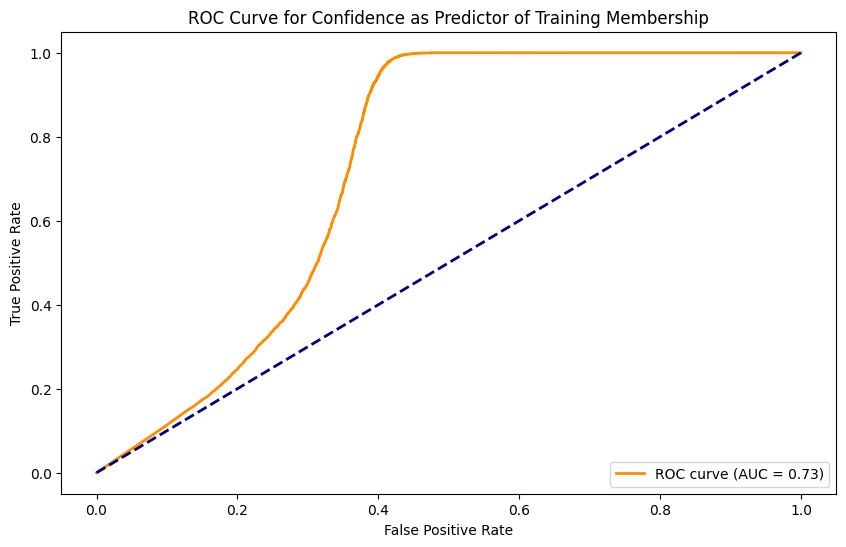

Threshold closest to 99% confidence: 30.32
True Positive Rate (TPR) at 99% confidence threshold: 1.00
False Positive Rate (FPR) at 99% confidence threshold: 1.00


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `max_confidences` is the array of confidence scores for each data point
# And `membership_flag` is the array with 1 for training data, 0 for non-training data

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(membership_flag, max_confidences)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Confidence as Predictor of Training Membership')
plt.legend(loc="lower right")
plt.show()

# Find the threshold closest to 99% confidence
closest_index = (np.abs(thresholds - 60)).argmin()  # Adjust if `max_confidences` are in raw probability form (0-1)
print(f"Threshold closest to 99% confidence: {thresholds[closest_index]:.2f}")
print(f"True Positive Rate (TPR) at 99% confidence threshold: {tpr[closest_index]:.2f}")
print(f"False Positive Rate (FPR) at 99% confidence threshold: {fpr[closest_index]:.2f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


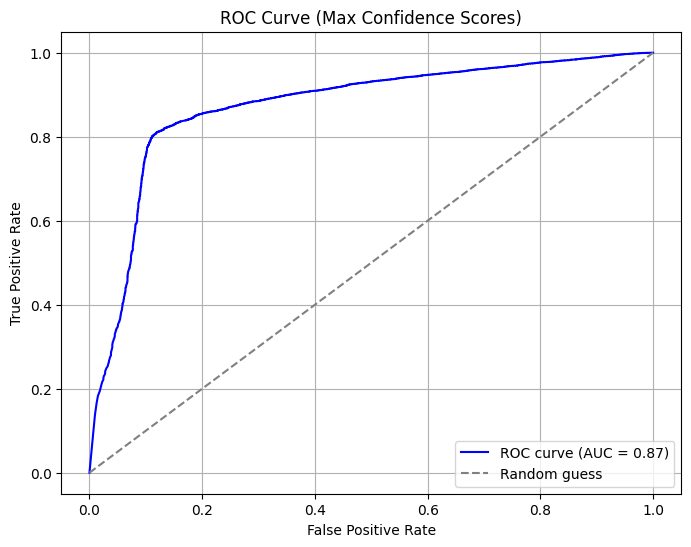

In [ ]:
#vignesh roc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = model.predict(combined_test_images)

# Get the true labels as integers
y_true = np.argmax(combined_test_labels, axis=1)

# Compute the max confidence score for each data point
max_confidence_scores = np.max(y_pred_probs, axis=1)

# Create a binary indicator: True if the model's prediction is correct, False otherwise
correct_predictions = (np.argmax(y_pred_probs, axis=1) == y_true).astype(int)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(correct_predictions, max_confidence_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random guess")
plt.title("ROC Curve (Max Confidence Scores)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


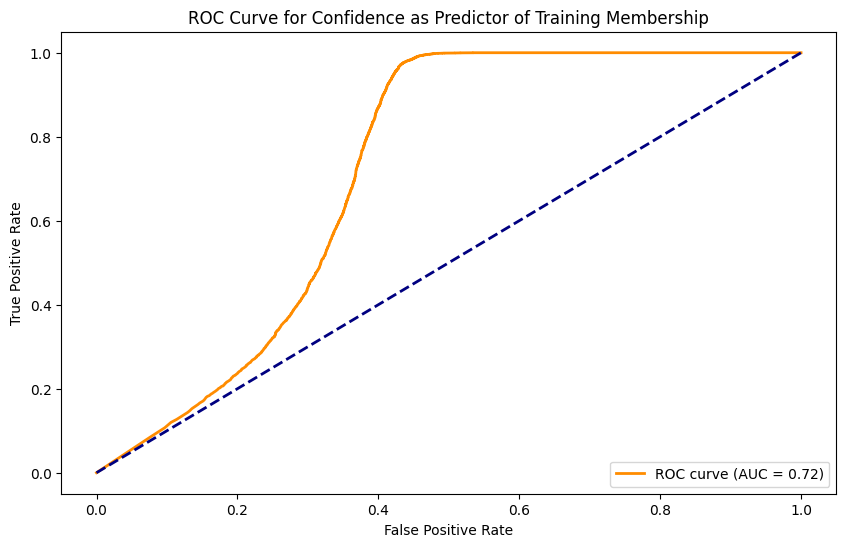

Threshold closest to 99% confidence: 98.86
True Positive Rate at this threshold: 1.00
False Positive Rate at this threshold: 0.57


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use max_confidences as the predictor (already extracted from probabilities)
# And use membership_flag (1 for training, 0 for non-training) as the true labels

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(membership_flag, max_confidences)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Confidence as Predictor of Training Membership')
plt.legend(loc="lower right")
plt.show()

# Print information on threshold closest to 99% confidence
closest_index = (np.abs(thresholds - 99)).argmin()  # Adjusted if max_confidences are in percentage
print(f"Threshold closest to 99% confidence: {thresholds[closest_index]:.2f}")
print(f"True Positive Rate at this threshold: {tpr[closest_index]:.2f}")
print(f"False Positive Rate at this threshold: {fpr[closest_index]:.2f}")


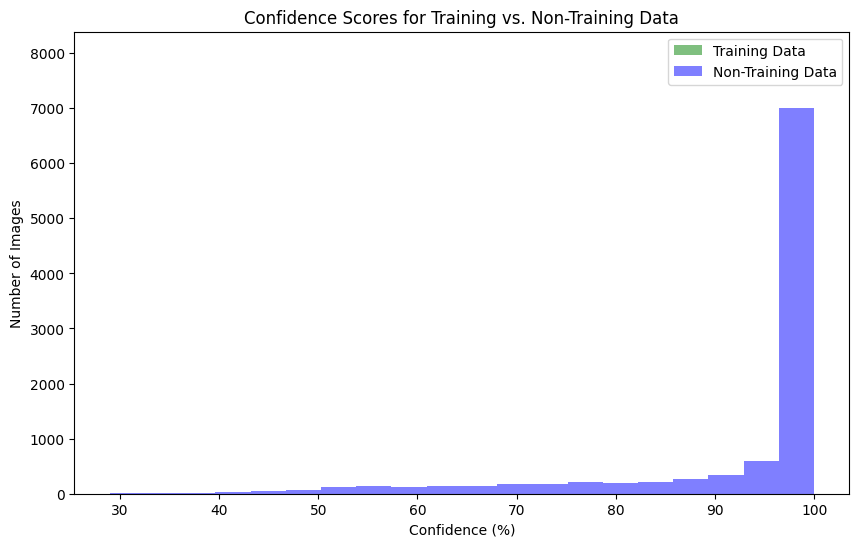

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of confidence scores for training and non-training data
plt.figure(figsize=(10, 6))
plt.hist(max_confidences[membership_flag == 1], bins=20, alpha=0.5, label='Training Data', color='green')
plt.hist(max_confidences[membership_flag == 0], bins=20, alpha=0.5, label='Non-Training Data', color='blue')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')
plt.title('Confidence Scores for Training vs. Non-Training Data')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Set confidence thresholds
thresholds = [90, 95, 99]

# Calculate percentages of training and non-training data above each threshold
for threshold in thresholds:
    training_above_threshold = np.sum((max_confidences >= threshold) & (membership_flag == 1))
    non_training_above_threshold = np.sum((max_confidences >= threshold) & (membership_flag == 0))

    total_training = np.sum(membership_flag == 1)
    total_non_training = np.sum(membership_flag == 0)

    training_pct = (training_above_threshold / total_training) * 100
    non_training_pct = (non_training_above_threshold / total_non_training) * 100

    print(f"Confidence >= {threshold}%:")
    print(f"  Training Data: {training_pct:.2f}%")
    print(f"  Non-Training Data: {non_training_pct:.2f}%\n")


Confidence >= 90%:
  Training Data: 100.00%
  Non-Training Data: 75.47%

Confidence >= 95%:
  Training Data: 100.00%
  Non-Training Data: 68.73%

Confidence >= 99%:
  Training Data: 100.00%
  Non-Training Data: 55.60%



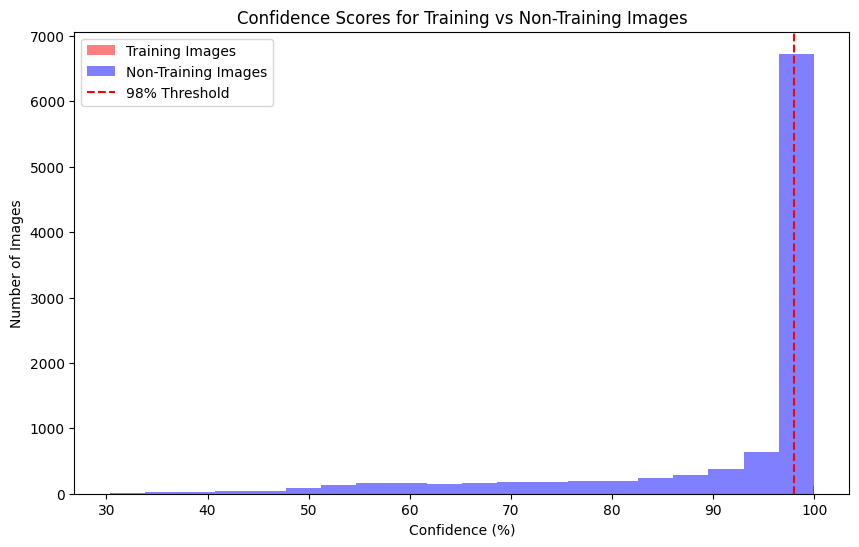

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of confidence scores for training and non-training images
plt.figure(figsize=(10, 6))

# Confidence for training images
plt.hist(max_confidences[membership_flag == 1], bins=20, alpha=0.5, label='Training Images', color='red')

# Confidence for non-training images
plt.hist(max_confidences[membership_flag == 0], bins=20, alpha=0.5, label='Non-Training Images', color='blue')

plt.axvline(x=confidence_threshold, color='red', linestyle='--', label=f'{confidence_threshold}% Threshold')
plt.title('Confidence Scores for Training vs Non-Training Images')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')
plt.legend(loc='upper left')
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


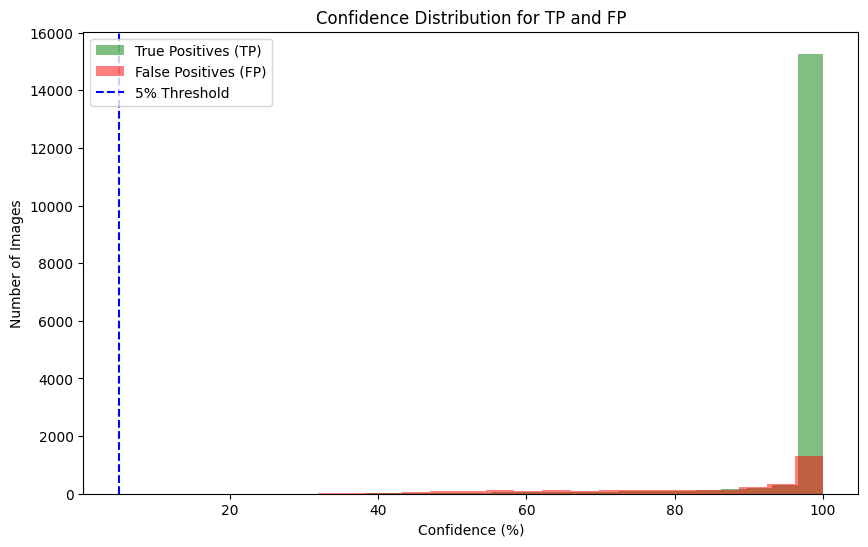

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Get the true labels from combined_test_labels (assuming they are still one-hot encoded)
true_labels = np.argmax(combined_test_labels, axis=1)

# Set a confidence threshold (e.g., 90%)
confidence_threshold = 5

# Determine correct predictions (True Positives) and incorrect ones (False Positives)
correct_predictions = predicted_classes == true_labels
incorrect_predictions = ~correct_predictions

# TP: Correct predictions with high confidence
tp_high_confidence = (correct_predictions & (max_confidences >= confidence_threshold))

# FP: Incorrect predictions with high confidence
fp_high_confidence = (incorrect_predictions & (max_confidences >= confidence_threshold))

# Plot histogram for True Positives (TP) and False Positives (FP)
plt.figure(figsize=(10, 6))

# Histogram for TP (True Positives)
plt.hist(max_confidences[tp_high_confidence], bins=20, alpha=0.5, label='True Positives (TP)', color='green')

# Histogram for FP (False Positives)
plt.hist(max_confidences[fp_high_confidence], bins=20, alpha=0.5, label='False Positives (FP)', color='red')

# Add vertical line for the confidence threshold
plt.axvline(x=confidence_threshold, color='blue', linestyle='--', label=f'{confidence_threshold}% Threshold')

# Set the title and labels
plt.title('Confidence Distribution for TP and FP')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


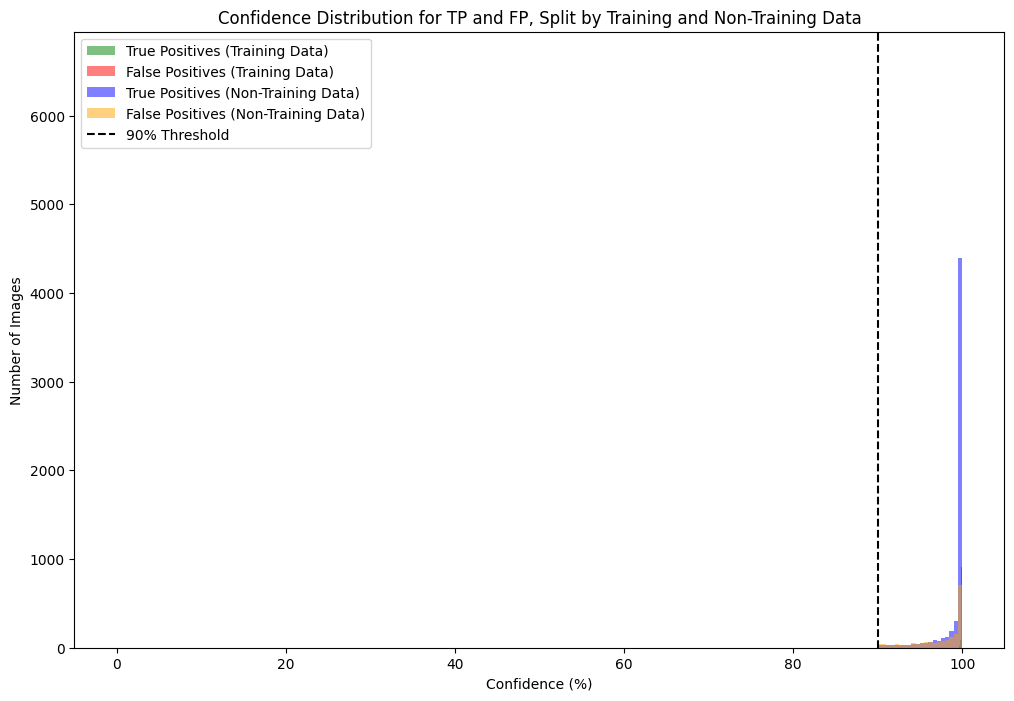

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Get the true labels from combined_test_labels (assuming they are still one-hot encoded)
true_labels = np.argmax(combined_test_labels, axis=1)

# Set a confidence threshold (e.g., 90%)
confidence_threshold = 90

# Determine correct predictions (True Positives) and incorrect ones (False Positives)
correct_predictions = predicted_classes == true_labels
incorrect_predictions = ~correct_predictions

# Membership flag is 1 for training images, 0 for non-training images
training_data = membership_flag == 1
non_training_data = membership_flag == 0

# TP and FP for training data
tp_training = (correct_predictions & (max_confidences >= confidence_threshold) & training_data)
fp_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & training_data)

# TP and FP for non-training data
tp_non_training = (correct_predictions & (max_confidences >= confidence_threshold) & non_training_data)
fp_non_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & non_training_data)

# Plot histogram for TP and FP, split by membership flag (training vs non-training)
plt.figure(figsize=(12, 8))

# Histogram for TP (True Positives) on training data
plt.hist(max_confidences[tp_training], bins=20, alpha=0.5, label='True Positives (Training Data)', color='green')

# Histogram for FP (False Positives) on training data
plt.hist(max_confidences[fp_training], bins=20, alpha=0.5, label='False Positives (Training Data)', color='red')

# Histogram for TP (True Positives) on non-training data
plt.hist(max_confidences[tp_non_training], bins=20, alpha=0.5, label='True Positives (Non-Training Data)', color='blue')

# Histogram for FP (False Positives) on non-training data
plt.hist(max_confidences[fp_non_training], bins=20, alpha=0.5, label='False Positives (Non-Training Data)', color='orange')

# Add vertical line for the confidence threshold
plt.axvline(x=confidence_threshold, color='black', linestyle='--', label=f'{confidence_threshold}% Threshold')

# Set the title and labels
plt.title('Confidence Distribution for TP and FP, Split by Training and Non-Training Data')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


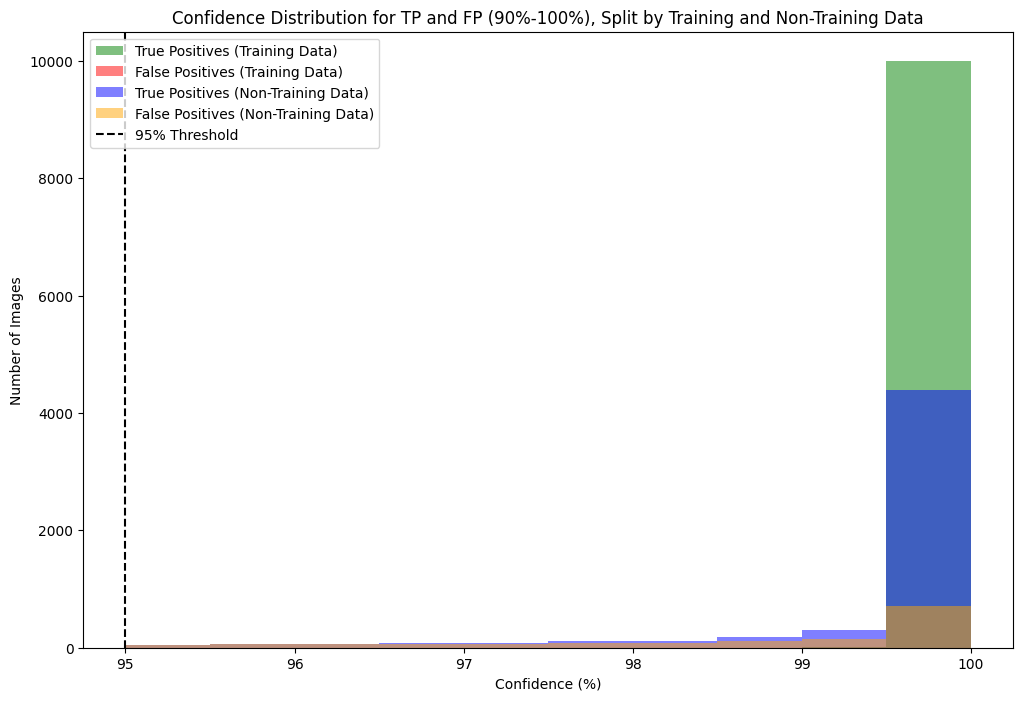

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Get the true labels from combined_test_labels (assuming they are still one-hot encoded)
true_labels = np.argmax(combined_test_labels, axis=1)

# Set a confidence threshold (e.g., 90%)
confidence_threshold = 95

# Determine correct predictions (True Positives) and incorrect ones (False Positives)
correct_predictions = predicted_classes == true_labels
incorrect_predictions = ~correct_predictions

# Membership flag is 1 for training images, 0 for non-training images
training_data = membership_flag == 1
non_training_data = membership_flag == 0

# TP and FP for training data
tp_training = (correct_predictions & (max_confidences >= confidence_threshold) & training_data)
fp_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & training_data)

# TP and FP for non-training data
tp_non_training = (correct_predictions & (max_confidences >= confidence_threshold) & non_training_data)
fp_non_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & non_training_data)

# Plot histogram for TP and FP, split by membership flag (training vs non-training)
plt.figure(figsize=(12, 8))

# Histogram for TP (True Positives) on training data (restricted to 90-100% confidence)
plt.hist(max_confidences[tp_training], bins=10, range=(95, 100), alpha=0.5, label='True Positives (Training Data)', color='green')

# Histogram for FP (False Positives) on training data (restricted to 90-100% confidence)
plt.hist(max_confidences[fp_training], bins=10, range=(95, 100), alpha=0.5, label='False Positives (Training Data)', color='red')

# Histogram for TP (True Positives) on non-training data (restricted to 90-100% confidence)
plt.hist(max_confidences[tp_non_training], bins=10, range=(95, 100), alpha=0.5, label='True Positives (Non-Training Data)', color='blue')

# Histogram for FP (False Positives) on non-training data (restricted to 90-100% confidence)
plt.hist(max_confidences[fp_non_training], bins=10, range=(95, 100), alpha=0.5, label='False Positives (Non-Training Data)', color='orange')

# Add vertical line for the confidence threshold
plt.axvline(x=confidence_threshold, color='black', linestyle='--', label=f'{confidence_threshold}% Threshold')

# Set the title and labels
plt.title('Confidence Distribution for TP and FP (90%-100%), Split by Training and Non-Training Data')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


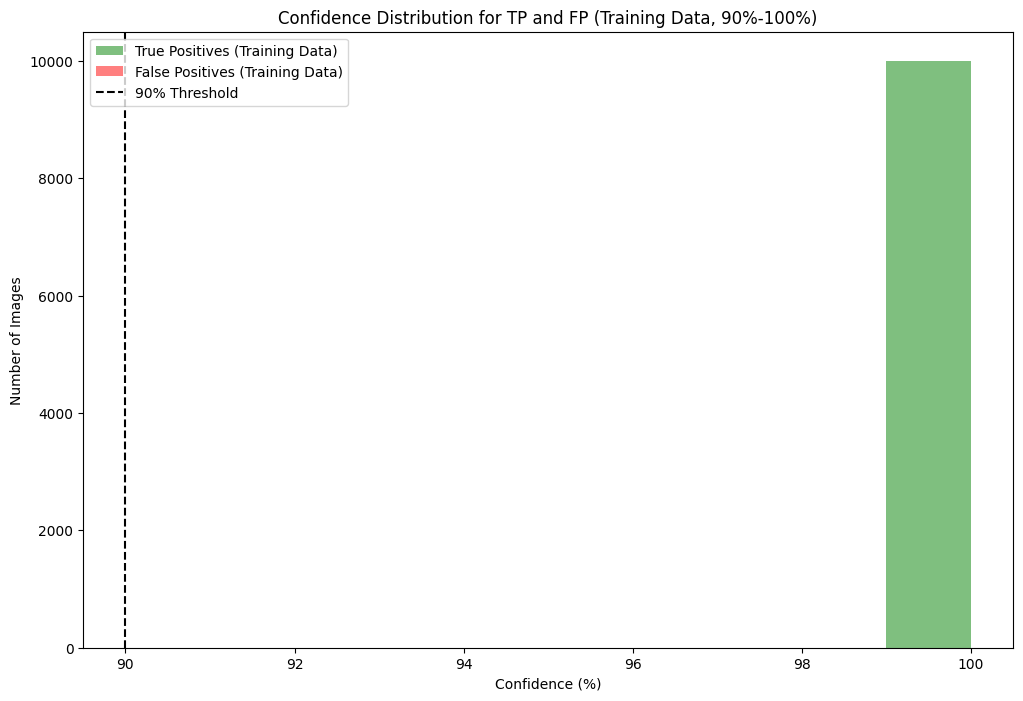

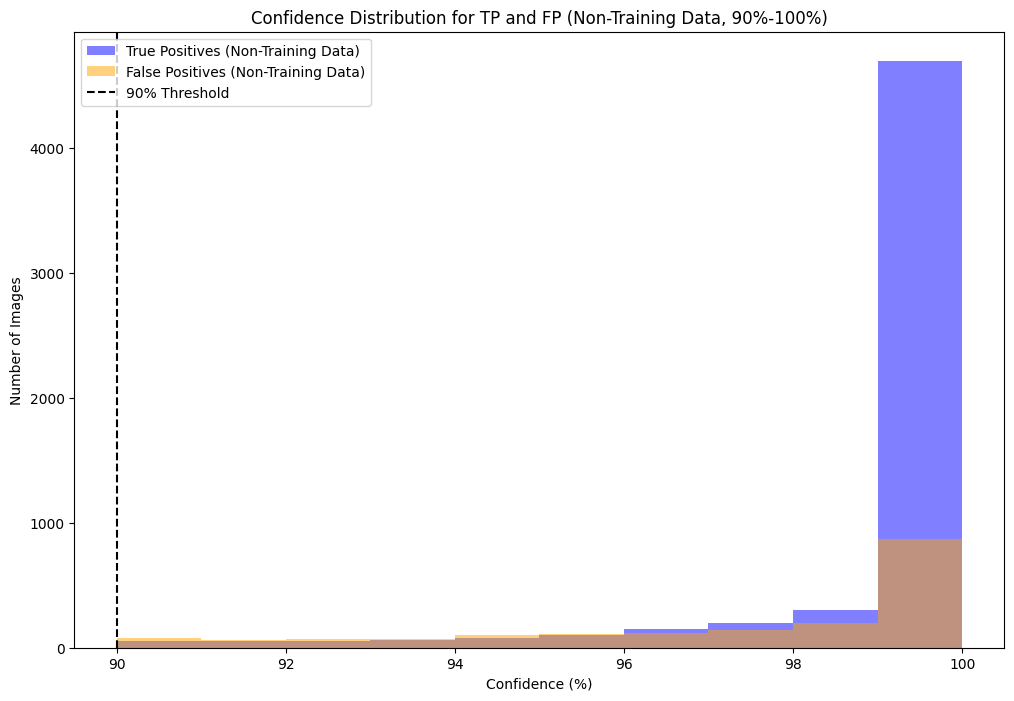

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Get the true labels from combined_test_labels (assuming they are still one-hot encoded)
true_labels = np.argmax(combined_test_labels, axis=1)

# Set a confidence threshold (e.g., 90%)
confidence_threshold = 90

# Determine correct predictions (True Positives) and incorrect ones (False Positives)
correct_predictions = predicted_classes == true_labels
incorrect_predictions = ~correct_predictions

# Membership flag is 1 for training images, 0 for non-training images
training_data = membership_flag == 1
non_training_data = membership_flag == 0

# TP and FP for training data
tp_training = (correct_predictions & (max_confidences >= confidence_threshold) & training_data)
fp_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & training_data)

# TP and FP for non-training data
tp_non_training = (correct_predictions & (max_confidences >= confidence_threshold) & non_training_data)
fp_non_training = (incorrect_predictions & (max_confidences >= confidence_threshold) & non_training_data)

# --------- Plot histogram for Training Data ---------
plt.figure(figsize=(12, 8))

# Histogram for TP (True Positives) on training data (restricted to 90-100% confidence)
plt.hist(max_confidences[tp_training], bins=10, range=(90, 100), alpha=0.5, label='True Positives (Training Data)', color='green')

# Histogram for FP (False Positives) on training data (restricted to 90-100% confidence)
plt.hist(max_confidences[fp_training], bins=10, range=(90, 100), alpha=0.5, label='False Positives (Training Data)', color='red')

# Add vertical line for the confidence threshold
plt.axvline(x=confidence_threshold, color='black', linestyle='--', label=f'{confidence_threshold}% Threshold')

# Set the title and labels
plt.title('Confidence Distribution for TP and FP (Training Data, 90%-100%)')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')

# Add legend
plt.legend(loc='upper left')

# Show plot for training data
plt.show()

# --------- Plot histogram for Non-Training Data ---------
plt.figure(figsize=(12, 8))

# Histogram for TP (True Positives) on non-training data (restricted to 90-100% confidence)
plt.hist(max_confidences[tp_non_training], bins=10, range=(90, 100), alpha=0.5, label='True Positives (Non-Training Data)', color='blue')

# Histogram for FP (False Positives) on non-training data (restricted to 90-100% confidence)
plt.hist(max_confidences[fp_non_training], bins=10, range=(90, 100), alpha=0.5, label='False Positives (Non-Training Data)', color='orange')

# Add vertical line for the confidence threshold
plt.axvline(x=confidence_threshold, color='black', linestyle='--', label=f'{confidence_threshold}% Threshold')

# Set the title and labels
plt.title('Confidence Distribution for TP and FP (Non-Training Data, 90%-100%)')
plt.xlabel('Confidence (%)')
plt.ylabel('Number of Images')

# Add legend
plt.legend(loc='upper left')

# Show plot for non-training data
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


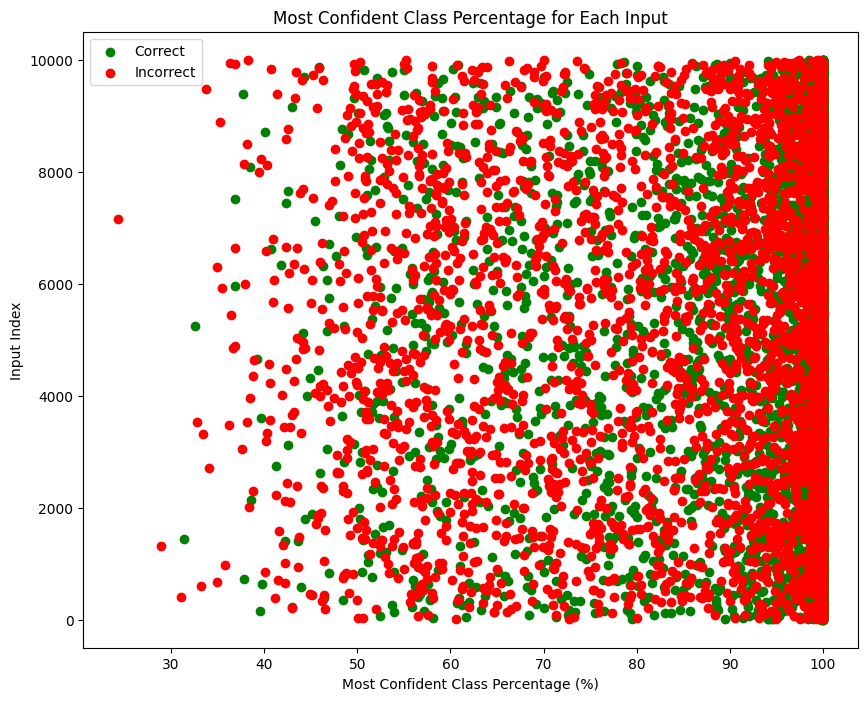

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities = model.predict(test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Ensure test_labels is a 1D array (flatten if necessary)
test_labels = test_labels.flatten()

# Compare predictions with true labels to identify correct and incorrect ones
correct_predictions = predicted_classes == test_labels

# Create a figure
plt.figure(figsize=(10, 8))

# Plot correct predictions in green
plt.scatter(max_confidences[correct_predictions], np.arange(len(test_images))[correct_predictions], color='green', label='Correct')

# Plot incorrect predictions in red
plt.scatter(max_confidences[~correct_predictions], np.arange(len(test_images))[~correct_predictions], color='red', label='Incorrect')

# Label the axes
plt.xlabel('Most Confident Class Percentage (%)')
plt.ylabel('Input Index')
plt.title('Most Confident Class Percentage for Each Input')

# Add a legend
plt.legend()

# Show the plot
plt.show()


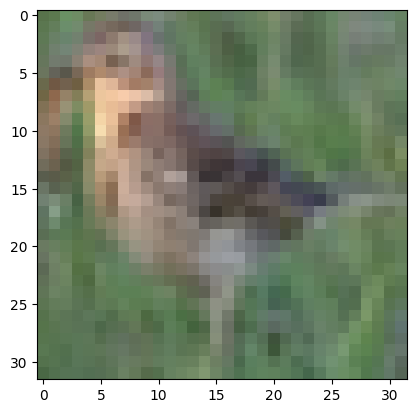

In [ ]:
plt.imshow(test_images[405])

In [ ]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select a specific image from the combined test set (e.g., image 405 in test_images)
image_index = 405
selected_image = test_images[image_index].reshape((1, 32, 32, 3))

# Predict the class of the selected image
predicted_class = class_names[np.argmax(model.predict(selected_image))]

# Check if the image is part of the training set or non-training set
is_training_image = "Yes" if membership_flag[image_index] == 1 else "No"

# Print out the prediction and membership status
print(f"The predicted class for test image {image_index} is: {predicted_class}")
print(f"Is this image part of the training set? {is_training_image}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
The predicted class for test image 405 is: deer
Is this image part of the training set? No


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


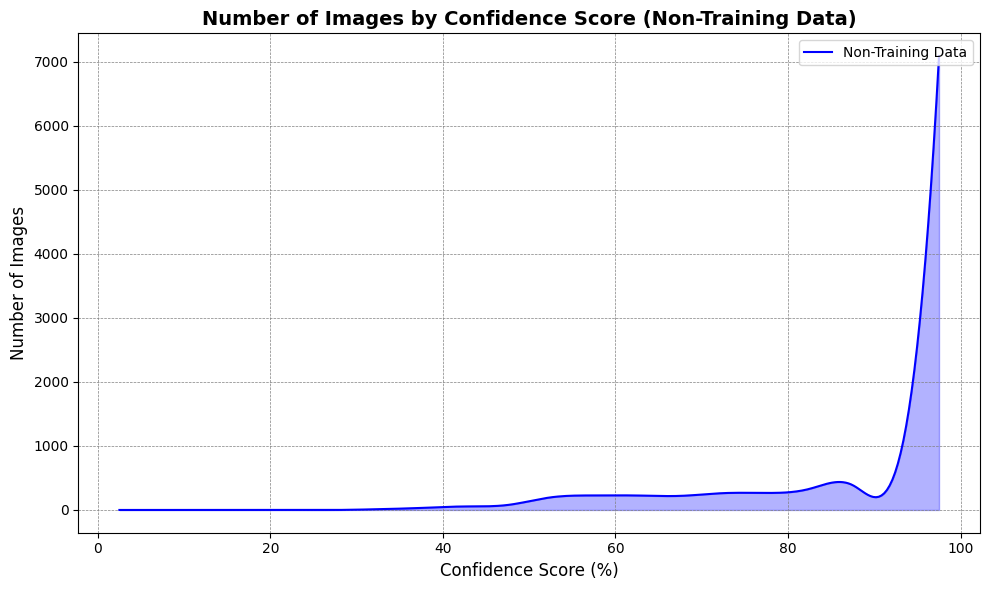

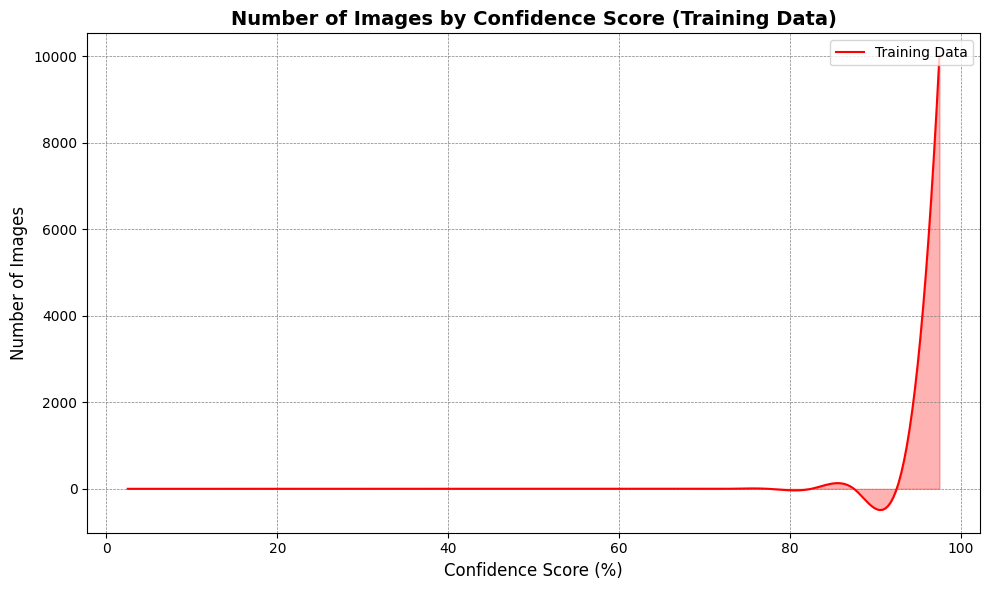

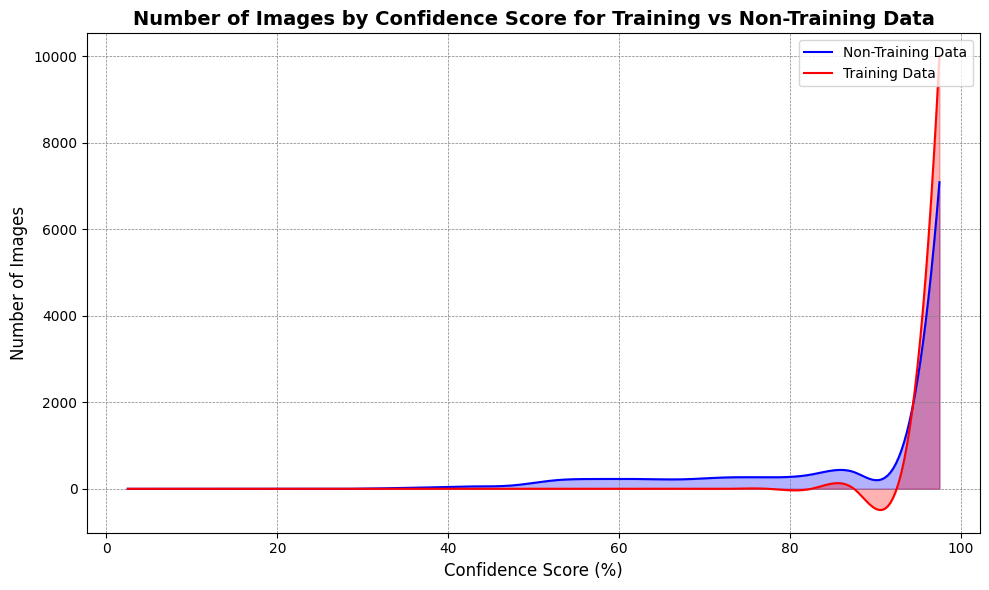

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Predict probabilities for each class in the combined test set
probabilities = model.predict(combined_test_images)

# Get the highest confidence score for each image
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Separate confidence scores based on membership flag
training_confidences = max_confidences[membership_flag == 1]
non_training_confidences = max_confidences[membership_flag == 0]

# Define confidence bins for the x-axis
confidence_bins = np.arange(0, 101, 5)  # Bins from 0 to 100% in steps of 5%

# Calculate histogram (count) of confidence scores for each group
training_counts, _ = np.histogram(training_confidences, bins=confidence_bins)
non_training_counts, _ = np.histogram(non_training_confidences, bins=confidence_bins)

# Smooth the lines using spline interpolation
x_vals = confidence_bins[:-1] + 2.5  # Center points within each bin
x_smooth = np.linspace(x_vals.min(), x_vals.max(), 300)  # More points for smoothness

# Spline for non-training data
non_training_spline = make_interp_spline(x_vals, non_training_counts, k=1)
training_spline = make_interp_spline(x_vals, training_counts, k=1)

# Spline for training data
training_spline = make_interp_spline(x_vals, training_counts, k=3)
training_smooth = training_spline(x_smooth)

# Plot 1: Non-Training Data Only
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Non-Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 2: Training Data Only
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 3: Combined Graph
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score for Training vs Non-Training Data', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


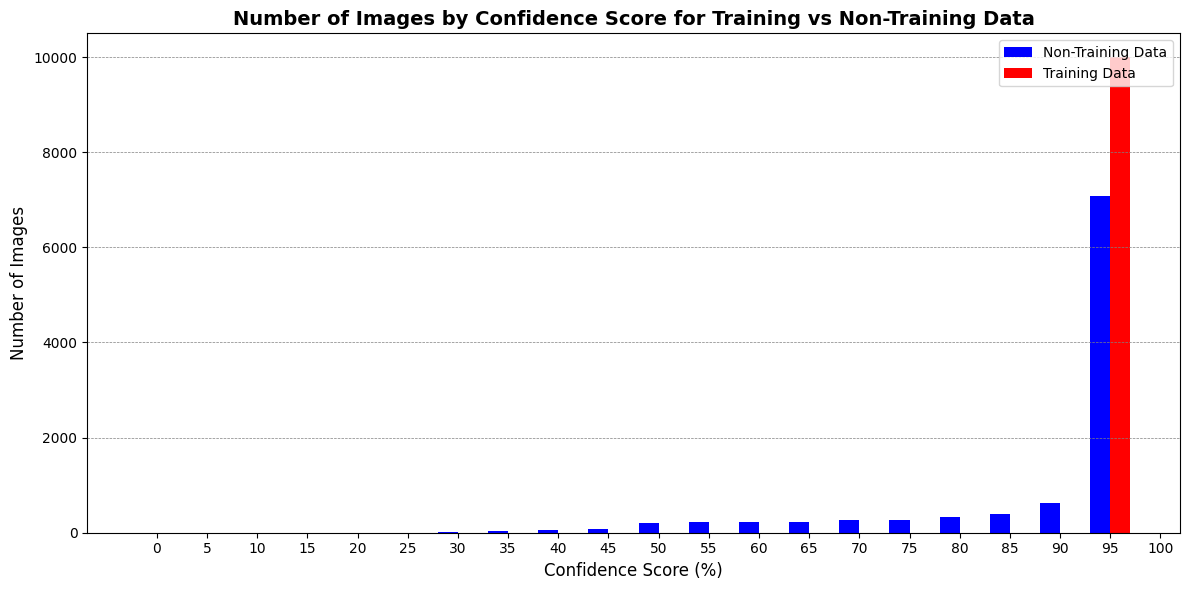

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for each class in the combined test set
probabilities = model.predict(combined_test_images)

# Get the highest confidence score for each image
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Separate confidence scores based on membership flag
training_confidences = max_confidences[membership_flag == 1]
non_training_confidences = max_confidences[membership_flag == 0]

# Define confidence bins for the x-axis
confidence_bins = np.arange(0, 101, 5)  # Bins from 0 to 100% in steps of 5%

# Calculate histogram (count) of confidence scores for each group
training_counts, _ = np.histogram(training_confidences, bins=confidence_bins)
non_training_counts, _ = np.histogram(non_training_confidences, bins=confidence_bins)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
width = 2  # Width of each bar

# Bar plot for non-training (original test set) data
plt.bar(confidence_bins[:-1] - width/2, non_training_counts, width=width, color='blue', label='Non-Training Data')

# Bar plot for training data
plt.bar(confidence_bins[:-1] + width/2, training_counts, width=width, color='red', label='Training Data')

# Labeling the plot
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score for Training vs Non-Training Data', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(confidence_bins, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


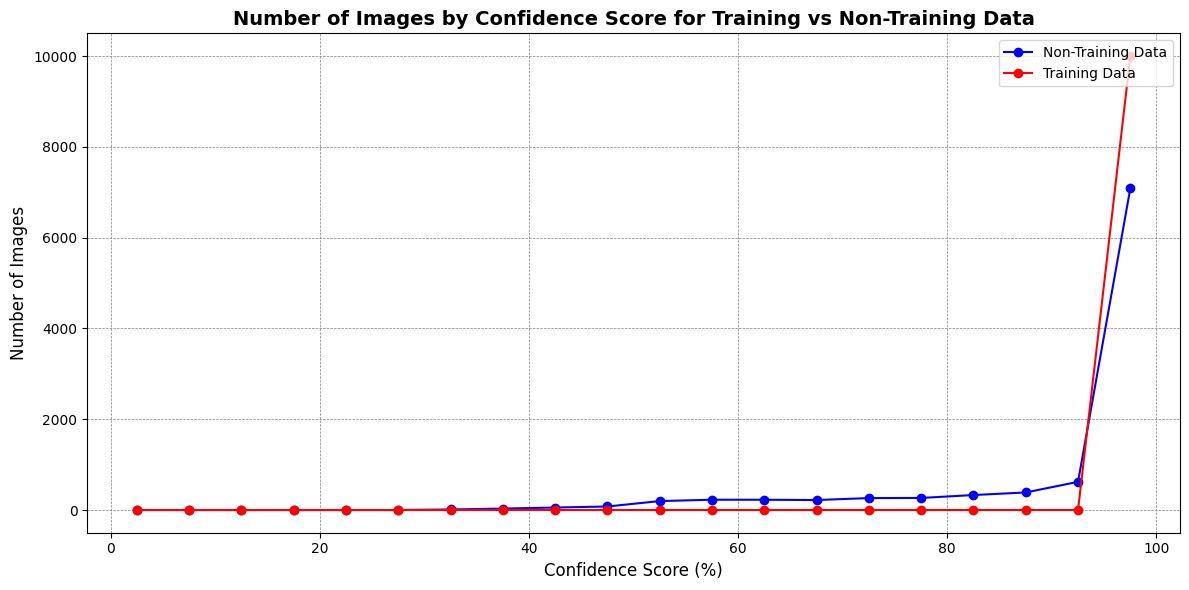

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for each class in the combined test set
probabilities = model.predict(combined_test_images)

# Get the highest confidence score for each image
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Separate confidence scores based on membership flag
training_confidences = max_confidences[membership_flag == 1]
non_training_confidences = max_confidences[membership_flag == 0]

# Define confidence bins for the x-axis
confidence_bins = np.arange(0, 101, 5)  # Bins from 0 to 100% in steps of 5%

# Calculate histogram (count) of confidence scores for each group
training_counts, _ = np.histogram(training_confidences, bins=confidence_bins)
non_training_counts, _ = np.histogram(non_training_confidences, bins=confidence_bins)

# Plotting the line graph
plt.figure(figsize=(12, 6))

# Line plot for non-training (original test set) data
plt.plot(confidence_bins[:-1] + 2.5, non_training_counts, color='blue', marker='o', linestyle='-', label='Non-Training Data')

# Line plot for training data
plt.plot(confidence_bins[:-1] + 2.5, training_counts, color='red', marker='o', linestyle='-', label='Training Data')

# Labeling the plot
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score for Training vs Non-Training Data', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


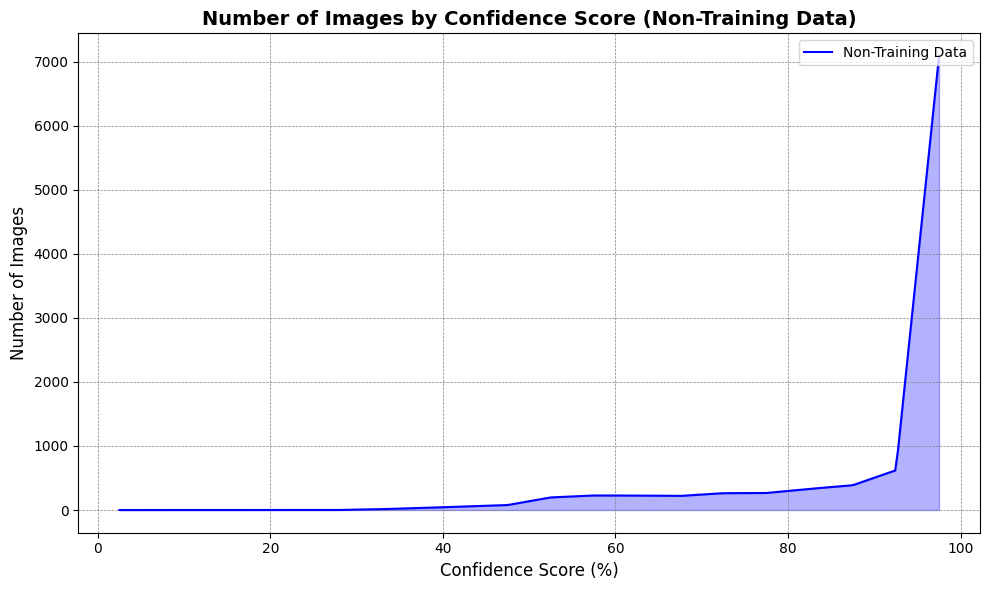

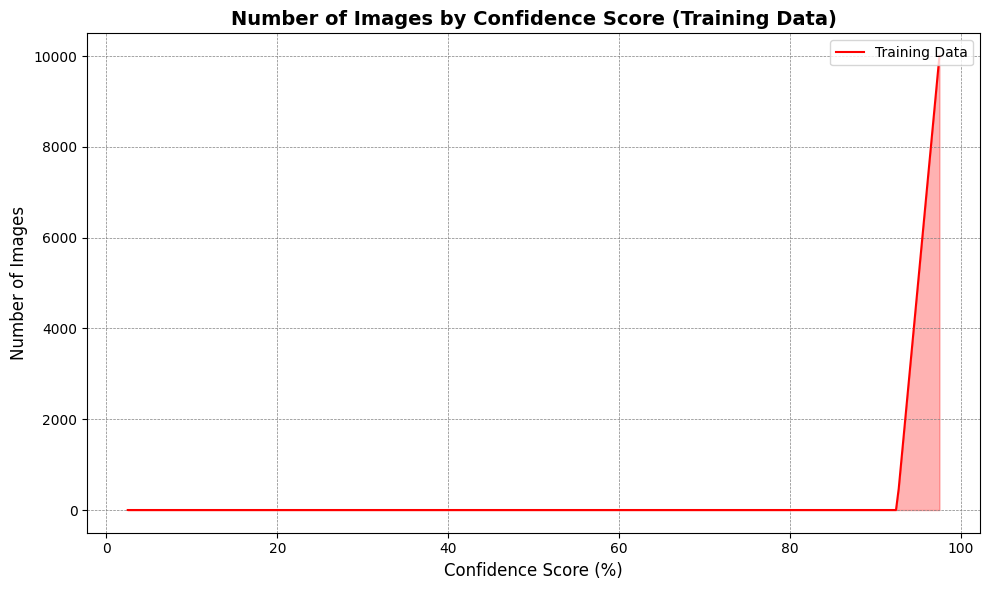

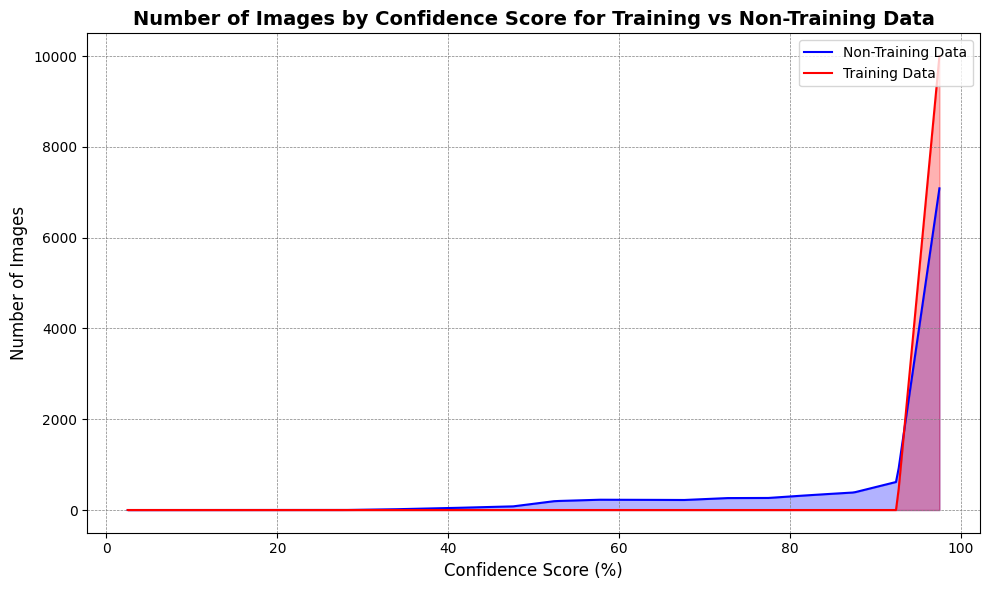

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Predict probabilities for each class in the combined test set
probabilities = model.predict(combined_test_images)

# Get the highest confidence score for each image
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Separate confidence scores based on membership flag
training_confidences = max_confidences[membership_flag == 1]
non_training_confidences = max_confidences[membership_flag == 0]

# Define confidence bins for the x-axis
confidence_bins = np.arange(0, 101, 5)  # Bins from 0 to 100% in steps of 5%

# Calculate histogram (count) of confidence scores for each group
training_counts, _ = np.histogram(training_confidences, bins=confidence_bins)
non_training_counts, _ = np.histogram(non_training_confidences, bins=confidence_bins)

# Smooth the lines using linear interpolation to avoid negative values
x_vals = confidence_bins[:-1] + 2.5  # Center points within each bin
x_smooth = np.linspace(x_vals.min(), x_vals.max(), 300)  # More points for smoothness

# Linear Spline for non-training data
non_training_spline = make_interp_spline(x_vals, non_training_counts, k=1)
non_training_smooth = non_training_spline(x_smooth)

# Linear Spline for training data and clip any potential negative values to zero
training_spline = make_interp_spline(x_vals, training_counts, k=1)
training_smooth = np.clip(training_spline(x_smooth), 0, None)

# Plot 1: Non-Training Data Only (Blue)
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Non-Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 2: Training Data Only (Red)
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 3: Combined Graph
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score for Training vs Non-Training Data', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()
